In [56]:
import numpy as np
import pandas as pd
import plotly

In [57]:
accounts = pd.read_csv('twm_accounts.csv', sep = ';')
checking_acct = pd.read_csv('twm_checking_acct.csv', sep = ';')
checking_tran = pd.read_csv('twm_checking_tran.csv', sep = ';')
credit_acct = pd.read_csv('twm_credit_acct.csv', sep = ';')
credit_tran = pd.read_csv('twm_credit_tran.csv', sep = ';')
customer = pd.read_csv('twm_customer.csv', sep = ';')
savings_acct = pd.read_csv('twm_savings_acct.csv', sep = ';')
savings_tran = pd.read_csv('twm_savings_tran.csv', sep = ';')
transaction = pd.read_csv('twm_transactions.csv', sep = ';')

In [58]:
customer.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY


In [59]:
accounts.head(4)

,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,13628063,1362806,SV,Y,10.12.1995,NaN,1430.22,284.58
1,4561143213627090,1362709,CC,Y,15.3.1993,NaN,266.34,496.15
2,4561143213628360,1362836,CC,Y,18.3.1992,NaN,55.90,1000.00
3,13633112,1363311,CK,Y,6.7.1995,NaN,11017.13,968.46


In [60]:
#remove categorical and non crucial features
accounts1 = accounts.drop(['acct_start_date', 'acct_end_date', 'account_active', 'starting_balance'], axis = 1)
accounts1.head(4)

,acct_nbr,cust_id,acct_type,ending_balance
0,13628063,1362806,SV,284.58
1,4561143213627090,1362709,CC,496.15
2,4561143213628360,1362836,CC,1000.00
3,13633112,1363311,CK,968.46


In [61]:
# set cust_id to index 0
temp_cols=accounts1.columns.tolist()
index=accounts1.columns.get_loc("cust_id")
new_cols=temp_cols[index:index+1] + temp_cols[0:index] + temp_cols[index+1:]
accounts1 = accounts1[new_cols]
accounts1.head()

,cust_id,acct_nbr,acct_type,ending_balance
0,1362806,13628063,SV,284.58
1,1362709,4561143213627090,CC,496.15
2,1362836,4561143213628360,CC,1000.00
3,1363311,13633112,CK,968.46
4,1363361,4561143213633610,CC,462.28


In [62]:
#total saved
savings_acct['total_saved'] =  savings_acct['ending_balance'] - savings_acct['starting_balance']

In [63]:
savings_acct.head()

,cust_id,acct_nbr,minimum_balance,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance,total_saved
0,1363160,13631603,100,BS,Y,9.5.1988,NaN,113.04,122.54,9.50
1,1362487,13624873,500,MM,N,27.6.1994,25.8.1995,651.73,12.89,-638.84
2,1362548,13625483,100,BS,Y,11.11.1986,NaN,250.24,254.02,3.78
3,1362752,13627523,100,BS,Y,20.2.1995,NaN,600.26,609.33,9.07
4,1363017,13630173,100,BS,N,27.4.1994,31.10.1995,2011.02,2901.35,890.33


In [64]:
#merge to customer list
df_bnk_behav = customer.merge(savings_acct[['cust_id', 'account_active','total_saved']].rename(columns={'account_active':'savings_account'}),
                                 left_on = 'cust_id',
                                 right_on = 'cust_id',
                                 how = 'left')

In [65]:
# fill missing values
df_bnk_behav['total_saved'].fillna(0, inplace=True)

In [66]:
df_bnk_behav.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code,savings_account,total_saved
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV,NaN,0.00
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA,N,-638.84
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA,Y,9.50
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA,Y,9.07
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY,Y,3.78


In [68]:
# client balance
credit_acct['credit_diff'] =  credit_acct['ending_balance'] - credit_acct['starting_balance']

In [69]:
# merge
df_bnk_behav = df_bnk_behav.merge(credit_acct[['cust_id', 'account_active',
                                                      'credit_diff','credit_limit']].rename(columns={'account_active':'credit_account'}),
                                  left_on = 'cust_id',
                                  right_on = 'cust_id',
                                  how = 'left')

In [74]:
# map values
df_bnk_behav['credit_account'] = df_bnk_behav['credit_account'].str.strip()\
                                         .replace({np.nan: 'dont_have',
                                         'Y': 'active',
                                         'N': 'inactive'})

In [76]:
# fill missing values
df_bnk_behav['credit_limit'].fillna(0, inplace=True)
df_bnk_behav['credit_diff'].fillna(0, inplace=True)
df_bnk_behav.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code,savings_account,total_saved,credit_account,credit_diff,credit_limit
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV,NaN,0.00,dont_have,0.00,0.0
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA,N,-638.84,active,1548.23,3000.0
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA,Y,9.50,active,-370.77,1000.0
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA,Y,9.07,inactive,-2302.14,2400.0
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY,Y,3.78,active,-6896.57,6700.0


In [75]:
df_bnk_behav.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code,savings_account,total_saved,credit_account,credit_diff,credit_limit
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV,NaN,0.00,dont_have,NaN,NaN
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA,N,-638.84,active,1548.23,3000.0
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA,Y,9.50,active,-370.77,1000.0
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA,Y,9.07,inactive,-2302.14,2400.0
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY,Y,3.78,active,-6896.57,6700.0


In [25]:
credit_acct.head()

,cust_id,acct_nbr,credit_limit,credit_rating,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,4561143213631600,1000,0,Y,12.10.1988,NaN,657.46,286.69
1,1362487,4561143213624870,3000,0,Y,8.8.1995,NaN,0.00,1548.23
2,1362548,4561143213625480,6700,0,Y,11.11.1986,NaN,6965.25,68.68
3,1362752,4561143213627520,2400,0,N,9.10.1994,2.4.1995,2302.14,0.00
4,1363017,4561143213630170,1000,0,Y,8.2.1995,NaN,0.00,1000.00


In [26]:
#create credit balance column
credit_acct['credit_balance'] = (credit_acct['ending_balance'] - credit_acct['credit_limit'])

In [27]:
credit_acct.head()

,cust_id,acct_nbr,credit_limit,credit_rating,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance,credit_balance
0,1363160,4561143213631600,1000,0,Y,12.10.1988,NaN,657.46,286.69,-713.31
1,1362487,4561143213624870,3000,0,Y,8.8.1995,NaN,0.00,1548.23,-1451.77
2,1362548,4561143213625480,6700,0,Y,11.11.1986,NaN,6965.25,68.68,-6631.32
3,1362752,4561143213627520,2400,0,N,9.10.1994,2.4.1995,2302.14,0.00,-2400.00
4,1363017,4561143213630170,1000,0,Y,8.2.1995,NaN,0.00,1000.00,0.00


In [28]:
#remove non necessary features
credit_acct = credit_acct.drop(['credit_limit', 'credit_rating', 'account_active', 'acct_start_date', 'acct_end_date', 'starting_balance', 'ending_balance'], axis = 1)
credit_acct.head()

,cust_id,acct_nbr,credit_balance
0,1363160,4561143213631600,-713.31
1,1362487,4561143213624870,-1451.77
2,1362548,4561143213625480,-6631.32
3,1362752,4561143213627520,-2400.00
4,1363017,4561143213630170,0.00


In [30]:
# add credit_balance column to accounts df
acct_w_credit = pd.merge(accounts1, credit_acct, on='cust_id')
acct_w_credit.head()

,cust_id,acct_nbr_x,acct_type,ending_balance,acct_nbr_y,credit_balance
0,1362806,13628063,SV,284.58,4561143213628060,-4358.36
1,1362806,13628062,CK,2561.24,4561143213628060,-4358.36
2,1362806,4561143213628060,CC,1541.64,4561143213628060,-4358.36
3,1362709,4561143213627090,CC,496.15,4561143213627090,-503.85
4,1362709,13627093,SV,917.33,4561143213627090,-503.85


In [31]:
acct_w_credit = acct_w_credit.drop(['cust_id', 'acct_type', 'acct_nbr_x', 'acct_nbr_y'], axis = 1)
acct_w_credit.head()

,ending_balance,credit_balance
0,284.58,-4358.36
1,2561.24,-4358.36
2,1541.64,-4358.36
3,496.15,-503.85
4,917.33,-503.85


In [35]:
import plotly.graph_objects as go
def plot_radarchart(df):
    data = []
    for i in range(0,len(df)):
        data.append(go.Scatterpolar(r = df.iloc[i].values,
                                    theta = df.iloc[i].index,
                                    name = f'cluster{df.index[i]}',
                                    fill = 'toself'))


    layout = go.Layout(polar = dict(radialaxis = dict(visible = True)),
                       showlegend = True)
    fig = go.Figure(data = data, layout = layout)
    fig.show()

In [39]:
plot_radarchart(acct_w_credit)

In [51]:
transaction = transaction.drop(['tran_id', 'principal_amt', 'interest_amt', 'tran_time', 'channel', 'new_balance', 'tran_date', 'tran_code'], axis = 1)
transaction.head()

,acct_nbr,tran_amt
58300,13624802,1534.10
13412,13624802,-358.06
23044,13624802,-25.32
69300,13624802,-23.42
45824,13624802,-12.66


In [52]:
transaction = transaction.sort_values(['acct_nbr'])
transaction.head()

,acct_nbr,tran_amt
58300,13624802,1534.10
44557,13624802,-0.15
3508,13624802,0.00
19208,13624802,1331.26
73638,13624802,-27.63


In [54]:
transaction1 = transaction.groupby(['acct_nbr', 'tran_amt']).mean()
transaction1.head()

Empty DataFrame
Columns: []
Index: [(13624802, -1488.51), (13624802, -808.49), (13624802, -421.47), (13624802, -358.06), (13624802, -332.29)]

In [78]:
# we need to have customer_id column in transcations to merge on customers
transaction = transaction.merge(accounts[['acct_nbr','cust_id']], 
                                        left_on = 'acct_nbr',
                                        right_on = 'acct_nbr',
                                        how = 'inner')

In [79]:
transaction.head()

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code,cust_id
0,27,13625623,0.00,0.00,0.00,3753.34,21.10.1995,121656,A,IQ,1362562
1,39,13625623,140.63,140.63,0.00,3859.95,27.12.1995,170033,B,DP,1362562
2,2,13625623,0.49,0.00,0.49,392.94,28.2.1995,235959,,IN,1362562
3,14,13625623,-120.00,-120.00,0.00,2253.68,6.8.1995,204727,A,WD,1362562
4,26,13625623,-140.00,-140.00,0.00,3753.34,21.10.1995,121543,A,WD,1362562


In [82]:
# compute summary stats from transactions
df_trans_grouped = transaction.groupby('cust_id').agg(avg_trans_amount = ('tran_amt', 'mean'),
                                                          total_trans_amount = ('tran_amt','sum'),
                                                          count_trans = ('tran_amt', 'count'))\
                                                      .reset_index()

In [83]:
df_trans_grouped.head()

,cust_id,avg_trans_amount,total_trans_amount,count_trans
0,1362480,13.923503,2185.99,157
1,1362484,1.793529,335.39,187
2,1362485,-5.412398,-925.52,171
3,1362486,-22.167200,-1108.36,50
4,1362487,-34.496311,-3553.12,103


In [84]:
# merge transactions stats on customers
df_bnk_behav = df_bnk_behav.merge(df_trans_grouped, 
                                  left_on='cust_id', 
                                  right_on = 'cust_id',
                                  how='inner')

In [85]:
# columns used in transaction segmentation
cols_to_use = ['savings_account', 'total_saved', 'credit_account', 'credit_diff',
               'credit_limit', 'avg_trans_amount', 'total_trans_amount','count_trans']
df_trans_seg = df_bnk_behav[cols_to_use]

In [86]:
df_trans_seg.dtypes

savings_account        object
total_saved           float64
credit_account         object
credit_diff           float64
credit_limit          float64
avg_trans_amount      float64
total_trans_amount    float64
count_trans             int64
dtype: object

In [87]:
# create dummy variables
df_trans_seg = pd.get_dummies(df_trans_seg, drop_first=True)

In [88]:
# import MiMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [89]:
# scaling
scaler = MinMaxScaler()

df_trans_seg_scaled = pd.DataFrame(scaler.fit_transform(df_trans_seg), columns = df_trans_seg.columns)

In [90]:
# import Kmeans 
from sklearn.cluster import KMeans

# import matplotlib
import matplotlib.pyplot as plt

In [91]:
# elbow rule
def plot_inertia(df):
    distortions = []
    for i in range(1, 11):
        km = KMeans(n_clusters=i,
                    n_init=10,
                    random_state=0)
        km.fit(df)
        distortions.append(km.inertia_)

    fig, ax = plt.subplots(figsize=(15,8))
    ax.plot(range(1,11), distortions, marker='o')
    ax.set_xlabel('Number of clusters')
    ax.set_ylabel('Distortion')
    ax.set_title('Elbow method')
    plt.show()

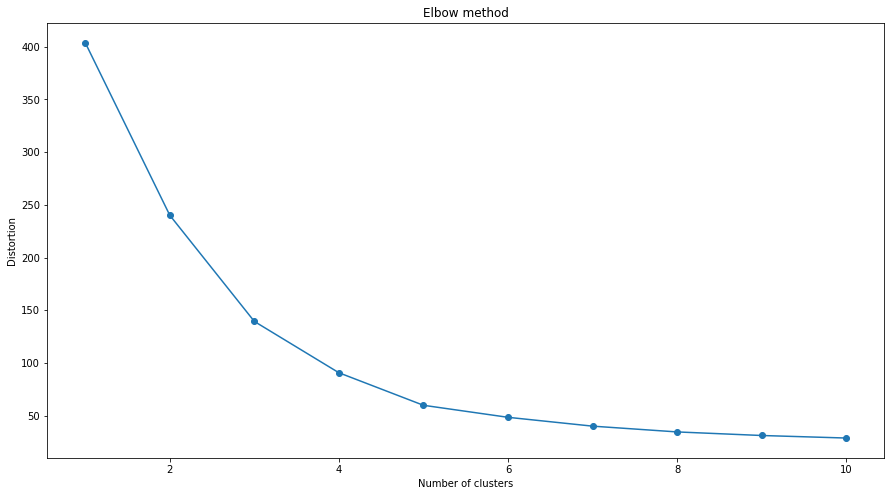

In [92]:
# elbow rule
plot_inertia(df_trans_seg_scaled)

In [93]:
# assign cluster to customers
df_trans_seg_scaled['cluster'] = KMeans(n_clusters=3, n_init=10).fit_predict(df_trans_seg_scaled)

In [94]:
# clusters size
df_trans_seg_scaled['cluster'].value_counts()

1    265
2    203
0    196
Name: cluster, dtype: int64

In [95]:
# data to radar chart
df_trans_radar = df_trans_seg_scaled.groupby('cluster').mean().divide(df_trans_seg_scaled.drop('cluster',axis=1).mean())*100

In [96]:
# import plotly
import plotly.graph_objects as go

In [97]:
# function that plots radar chart
def plot_radarchart(df):
    data = []
    for i in range(0,len(df)):
        data.append(go.Scatterpolar(r = df.iloc[i].values,
                                    theta = df.iloc[i].index,
                                    name = f'cluster{df.index[i]}',
                                    fill = 'toself'))


    layout = go.Layout(polar = dict(radialaxis = dict(visible = True)),
                       showlegend = True)
    fig = go.Figure(data = data, layout = layout)
    fig.show()

In [98]:
# plot radar chart
plot_radarchart(df_trans_radar)

In [99]:
#remove non necessary features
credit_acct = credit_acct.drop(['cust_id', 'credit_limit', 'credit_rating', 'account_active', 'acct_start_date', 'acct_end_date', 'starting_balance', 'ending_balance'], axis = 1)
credit_acct.head()

,acct_nbr,credit_diff
0,4561143213631600,-370.77
1,4561143213624870,1548.23
2,4561143213625480,-6896.57
3,4561143213627520,-2302.14
4,4561143213630170,1000.00


In [102]:
# add credit_balance column to accounts df
acct_w_credit = pd.merge(accounts, credit_acct, on='acct_nbr')
acct_w_credit.head()

,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance,credit_diff
0,4561143213627090,1362709,CC,Y,15.3.1993,NaN,266.34,496.15,229.81
1,4561143213628360,1362836,CC,Y,18.3.1992,NaN,55.90,1000.00,944.10
2,4561143213633610,1363361,CC,Y,17.6.1994,NaN,849.37,462.28,-387.09
3,4561143213631020,1363102,CC,Y,30.11.1995,NaN,0.00,1000.00,1000.00
4,4561143213633270,1363327,CC,Y,2.4.1995,NaN,0.00,3000.00,3000.00


In [104]:
transaction = transaction.drop(['tran_id', 'principal_amt', 'interest_amt', 'tran_time', 'channel', 'new_balance', 'tran_date', 'tran_code'], axis = 1)
transaction.head()

KeyError: "['tran_id', 'principal_amt', 'interest_amt', 'tran_time', 'channel', 'new_balance', 'tran_date', 'tran_code'] not found in axis"

In [105]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_trans_seg_scaled)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [106]:
principalDf.head()

,principal component 1,principal component 2
0,-1.118627,0.353515
1,0.001267,-0.509042
2,-0.059225,-0.544903
3,-0.024216,-0.546241
4,-1.134283,0.315113


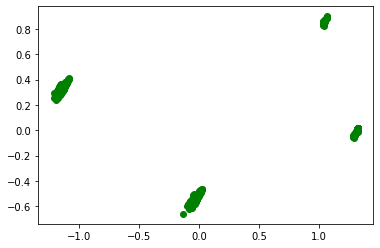

<Figure size 432x288 with 0 Axes>

In [107]:
plot = plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'], c='g')
plt.show()
plt.savefig('bank_scatter_pca')